<a href="https://colab.research.google.com/github/manavgupta1261/Machine-Learning/blob/main/2348529_Lab3ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv('/Market_Basket_Optimisation.csv',header = None)

In [ ]:
df.head
df.info

<bound method DataFrame.info of                  0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green gra

In [ ]:
transactions=[]
for index, row in df.iterrows():
 transactions.append(row.dropna().tolist)

In [ ]:
transactions[:1]

[<bound method IndexOpsMixin.tolist of 0                shrimp
 1               almonds
 2               avocado
 3        vegetables mix
 4          green grapes
 5      whole weat flour
 6                  yams
 7        cottage cheese
 8          energy drink
 9          tomato juice
 10       low fat yogurt
 11            green tea
 12                honey
 13                salad
 14        mineral water
 15               salmon
 16    antioxydant juice
 17      frozen smoothie
 18              spinach
 19            olive oil
 Name: 0, dtype: object>]

In [ ]:
transactions1 = []
for i in range(0, len(df)):
    transactions1.append([str(df.values[i,j]) for j in range(0, len(df.columns))])

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder().fit(transactions1)
onehot = encoder.transform(transactions1)
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)
onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
unique_items=(df[0].unique())
print (unique_items)

['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [ ]:
encoded_vals        = []
for i, rows in df.iterrows():
	labels          = {}
	uncommons       = list(set(unique_items) - set(rows))
	commons         = list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc]  = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df           = pd.DataFrame(encoded_vals)

print(encode_df.head())

   shallot  pepper  protein bar  clothes accessories  frozen vegetables  \
0        0       0            0                    0                  0   
1        0       0            0                    0                  0   
2        0       0            0                    0                  0   
3        0       0            0                    0                  0   
4        0       0            0                    0                  0   

   ketchup  pasta  mushroom cream sauce  cooking oil  oatmeal  ...  \
0        0      0                     0            0        0  ...   
1        0      0                     0            0        0  ...   
2        0      0                     0            0        0  ...   
3        0      0                     0            0        0  ...   
4        0      0                     0            0        0  ...   

   tomato juice  salad  shrimp  frozen smoothie  green grapes  yams  salmon  \
0             1      1       1                1  

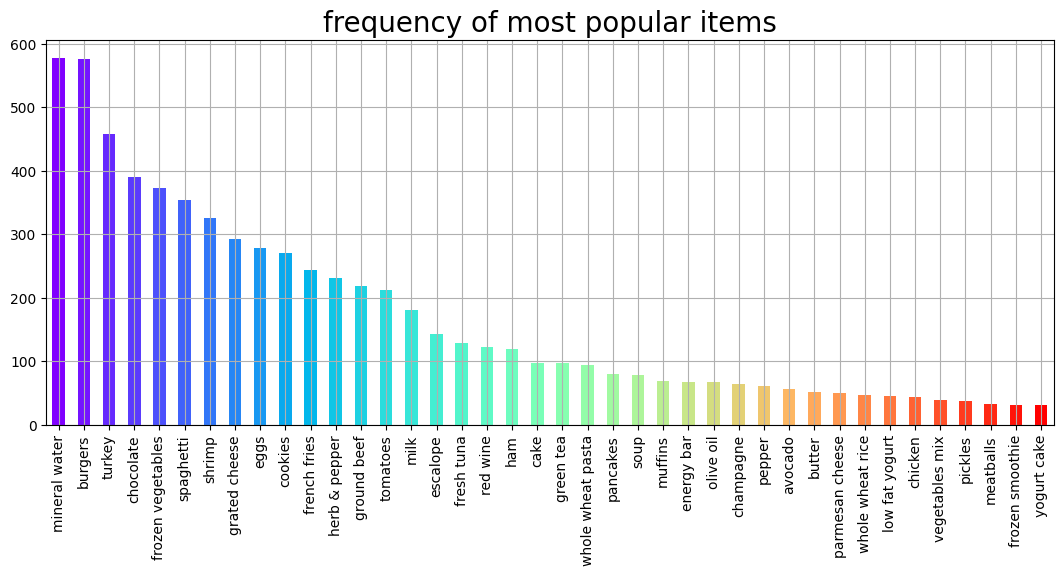

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [ ]:
min_support = 0.03
frequent_itemsets = apriori(encode_df, min_support=min_support, use_colnames=True)

In [ ]:
min_confidence = 0.1
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)


In [ ]:
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(association_rules_df)


Frequent Itemsets:
     support                            itemsets
0   0.095321                 (frozen vegetables)
1   0.051060                       (cooking oil)
2   0.032396                          (hot dogs)
3   0.087188                           (burgers)
4   0.058526                  (whole wheat rice)
5   0.081056                              (cake)
6   0.179709                              (eggs)
7   0.098254                       (ground beef)
8   0.046794                         (champagne)
9   0.049460                     (herb & pepper)
10  0.033729                          (brownies)
11  0.059992                           (chicken)
12  0.062525                            (turkey)
13  0.068391                          (tomatoes)
14  0.050527                              (soup)
15  0.079323                          (escalope)
16  0.052393                     (grated cheese)
17  0.043061                       (fresh bread)
18  0.129583                              (milk)
1

In [ ]:
frequent_items = frequent_itemsets['itemsets'].apply(lambda x: list(x)[0])
item_frequencies = encode_df[frequent_items].sum()


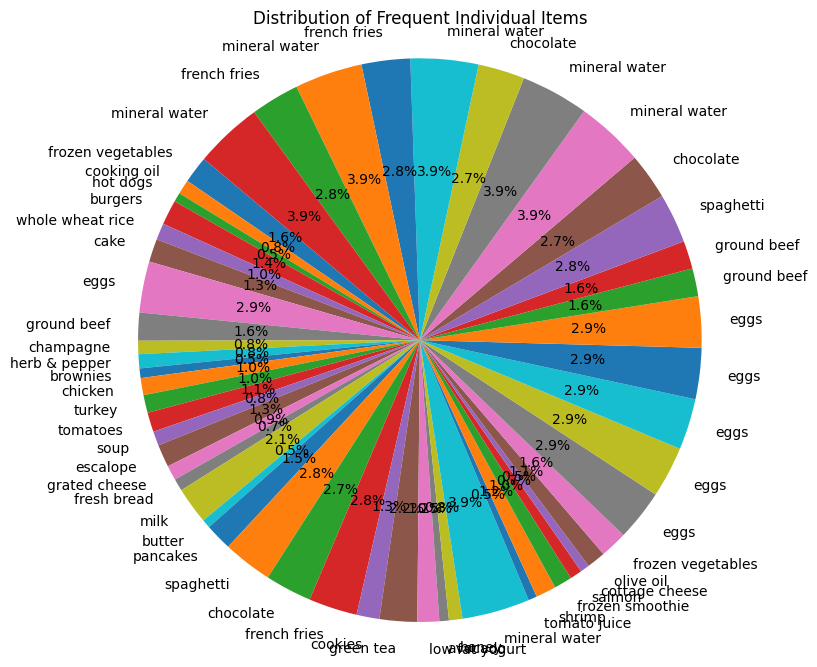

In [ ]:
labels = item_frequencies.index
sizes = item_frequencies.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Frequent Individual Items')
plt.show()